In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Users\erosb\09-2023 Boat Sales Analysis'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'boats_wrangled.csv'))

In [4]:
%matplotlib inline

#### #4 Create scatterplot - age of boat vs. number of views

In [6]:
#exclude unknown year builts
df_yr_known = df[df['Year Built'] != 0]

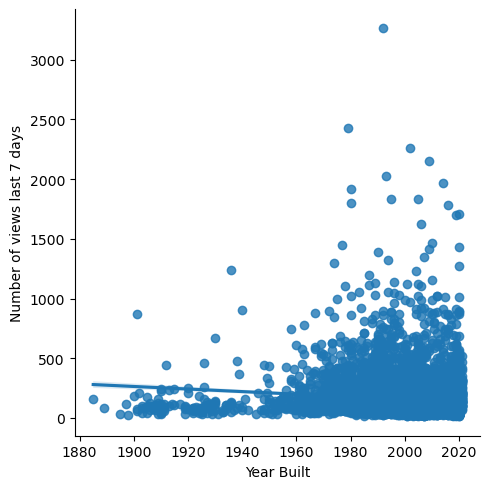

In [7]:
sns.lmplot(x='Year Built', y='Number of views last 7 days', data=df_yr_known)

#### #5 Hypothesis: the newer the boat, the more views it will receive.

#### #6 Reshape variables into numpy arrays

In [8]:
X = df_yr_known['Year Built'].values.reshape(-1,1)
y = df_yr_known['Number of views last 7 days'].values.reshape(-1,1)

In [11]:
X

array([[2017],
       [2020],
       [2020],
       ...,
       [2020],
       [2018],
       [2019]], dtype=int64)

In [13]:
y

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

#### #7 Split data into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### #8 Regression Analysis

In [26]:
# Create a regression object to be fit onto the training set
regression = LinearRegression() 

In [27]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

#### #9 Plot the regression line on test set

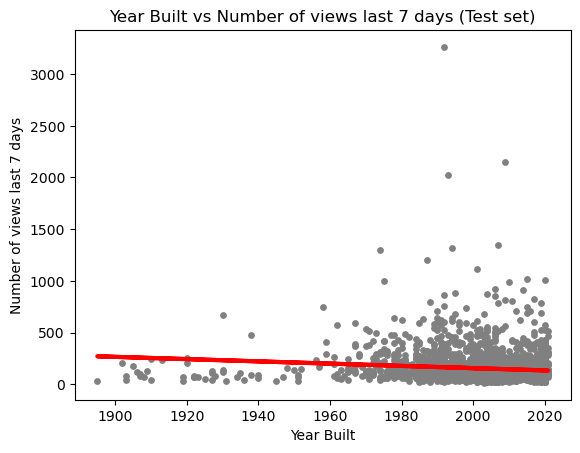

In [18]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Built vs Number of views last 7 days (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

#### #10 Interpret the line of fit

The line of fit is not perfect, the linear trend is actually down because of the sheer number of boats built after 1960 compared to before. It would be good to look at boats only built after then.

#### #11 Model performance statistics

In [19]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.09261197]]
Mean squared error:  23649.75190923263
R2 score:  0.011656969413552543


Interpret

The slope means that for every year older, the boat will receive about one less view.

MSE is large meaning the regression line is not an accurate representation of the data.

R2 is very close to 0 also indicating the line is not a good fit of the data.

In [21]:
#try boats after 1960
df_newer = df[df['Year Built'] >=1960]

In [24]:
X = df_newer['Year Built'].values.reshape(-1,1)
y = df_newer['Number of views last 7 days'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
regression = LinearRegression() 

In [ ]:
regression.fit(X_train, y_train)

In [ ]:
y_predicted = regression.predict(X_test)

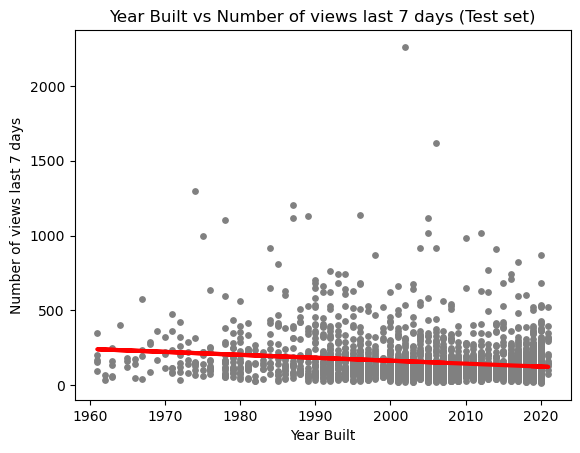

In [29]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Built vs Number of views last 7 days (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

In [30]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.9607353]]
Mean squared error:  19756.157396376002
R2 score:  0.03150622996470642


Interpret

The slope here indicates that for every year newer, the boat will receive about 2 less views.

The MSE is still very large and R2 is close to zero meaning that the line is not a good fit.

#### #12 Compare predicted y with actual

In [32]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,63,126.286978
1,36,124.326243
2,118,165.501684
3,104,200.794919
4,31,163.540949
5,205,175.305361
6,56,149.815802
7,105,124.326243
8,32,128.247713
9,275,155.698008


#### #13 Model performance

Both models did not perform well - therefore we can reject the hypothesis that the newer the boat, the more views it will get. The trend is actually the opposite, although the correlation is very weak. It can only be concluded that age of the boat alone does not give a clear indication of the listing's popularity.